# Regression Model For Predicting Movie Box Office Gross

Group Members: Yingjuan Wu, Sahand Zeinali, Ying Wu

Project Description: 
In this project, we will explore factors that contribute to a movie’s theatrical revenues. We will use worldwide box-office gross as the target variable, and use relevant information that are available before a movie releases as input variables, including, number of critic reviews, duration of movie (in mins), director facebook likes, cast total facebook likes, genres, budget, country, content-rating, imdb_score, etc.

In [3]:
%matplotlib inline

import numpy as np 
import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt
#import file, remove duplicate movies
movies = pd.read_csv("movie_metadata.csv", header = 0)
original_headers = list(movies.columns.values)#save headers in a list
movies = movies.drop_duplicates(['movie_title'])
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#select relevant features
movies = movies[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'genres', 'cast_total_facebook_likes', 'facenumber_in_poster', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score']]

In [5]:
movies.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,genres,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score
0,723.0,178.0,0.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,4834,0.0,USA,PG-13,237000000.0,2009.0,7.9
1,302.0,169.0,563.0,309404152.0,Action|Adventure|Fantasy,48350,0.0,USA,PG-13,300000000.0,2007.0,7.1
2,602.0,148.0,0.0,200074175.0,Action|Adventure|Thriller,11700,1.0,UK,PG-13,245000000.0,2015.0,6.8
3,813.0,164.0,22000.0,448130642.0,Action|Thriller,106759,0.0,USA,PG-13,250000000.0,2012.0,8.5
4,NaN,NaN,131.0,NaN,Documentary,143,0.0,NaN,NaN,NaN,NaN,7.1


In [6]:
#select movies produced in the past 50 years, remove movies that do not have box office gross, 
# (e.g. documentary movies) and that do not have director_facebook_likes 
#(e.g. director does not have facebook)
movies = movies[movies['gross'] > 0]
movies = movies[movies['director_facebook_likes'] > 0]
movies = movies[movies['title_year'] >= 1966]
#remove variable 'title_year' 
#since it is just used to select records but not a predictor variable
movies = movies[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'genres', 'cast_total_facebook_likes', 'facenumber_in_poster', 'country', 'content_rating', 'budget', 'imdb_score']]

In [7]:
#print data shape
movies.shape

(3321, 11)

In [8]:
#check number of missing values in 'genres'
movies['genres'].isnull().sum()

0

In [9]:
#check number of missing values in 'country'
movies['country'].isnull().sum()

0

In [10]:
#check number of missing values in 'num_critic_for_reviews'
movies['num_critic_for_reviews'].isnull().sum()

1

In [11]:
#check number of missing values in 'duration'
movies['duration'].isnull().sum()

1

In [12]:
#check number of missing values in 'cast_total_facebook_likes'
movies['cast_total_facebook_likes'].isnull().sum()

0

In [13]:
#check number of missing values in 'facenumber_in_poster'
movies['facenumber_in_poster'].isnull().sum()

5

In [14]:
#check number of missing values in 'budget'
movies['budget'].isnull().sum()

223

In [15]:
#check number of missing values in 'imdb_score'
movies['imdb_score'].isnull().sum()

0

In [16]:
#impute missing values with mean
movies['num_critic_for_reviews'] = movies['num_critic_for_reviews'].fillna(movies['num_critic_for_reviews'].mean())

In [17]:
#impute missing values with mean
movies['duration'] = movies['duration'].fillna(movies['duration'].mean())

In [18]:
#impute missing values with mean
movies['facenumber_in_poster'] = movies['facenumber_in_poster'].fillna(movies['facenumber_in_poster'].mean())

In [19]:
#impute missing values with mean
movies['budget'] = movies['budget'].fillna(movies['budget'].mean())

In [20]:
#Categorize Genres feature

#First find out all categories
genresList = movies['genres'].str.split('|')
genresArray = np.asarray(genresList)
oneArray = sum(genresArray, [])
genres = np.unique(oneArray)
#genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery','News','Romance','Sci-Fi','Short','Sport','Thriller','War','Western']

#Second add new binary features
i=0 
while i<len(genres): 
    movies[genres[i]]=movies['genres'].str.contains(genres[i]).astype(int)
    i=i+1

#Visualization
movies.head()




,num_critic_for_reviews,duration,director_facebook_likes,gross,genres,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,302.0,169.0,563.0,309404152.0,Action|Adventure|Fantasy,48350,0.0,USA,PG-13,300000000.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,448130642.0,Action|Thriller,106759,0.0,USA,PG-13,250000000.0,...,0,0,0,0,0,0,0,1,0,0
5,462.0,132.0,475.0,73058679.0,Action|Adventure|Sci-Fi,1873,1.0,USA,PG-13,263700000.0,...,0,0,0,0,1,0,0,0,0,0
7,324.0,100.0,15.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,2036,1.0,USA,PG,260000000.0,...,1,0,0,1,0,0,0,0,0,0
9,375.0,153.0,282.0,301956980.0,Adventure|Family|Fantasy|Mystery,58753,3.0,UK,PG,250000000.0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
#Categorize Countries feature

countries = movies['country'].unique()
i=0
while i<len(countries):
    movies[countries[i]]=movies['country'].str.contains(countries[i]).astype(int)
    i=i+1

movies.head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,genres,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,...,Brazil,Finland,Norway,Sweden,Argentina,Colombia,Poland,Israel,Indonesia,Afghanistan
1,302.0,169.0,563.0,309404152.0,Action|Adventure|Fantasy,48350,0.0,USA,PG-13,300000000.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,448130642.0,Action|Thriller,106759,0.0,USA,PG-13,250000000.0,...,0,0,0,0,0,0,0,0,0,0
5,462.0,132.0,475.0,73058679.0,Action|Adventure|Sci-Fi,1873,1.0,USA,PG-13,263700000.0,...,0,0,0,0,0,0,0,0,0,0
7,324.0,100.0,15.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,2036,1.0,USA,PG,260000000.0,...,0,0,0,0,0,0,0,0,0,0
9,375.0,153.0,282.0,301956980.0,Adventure|Family|Fantasy|Mystery,58753,3.0,UK,PG,250000000.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(countries)

['USA' 'UK' 'Canada' 'Australia' 'China' 'Germany' 'New Line' 'France'
 'Japan' 'Spain' 'Hong Kong' 'Czech Republic' 'India' 'Peru' 'New Zealand'
 'South Korea' 'Aruba' 'Denmark' 'Ireland' 'South Africa' 'Romania' 'Chile'
 'Italy' 'Netherlands' 'Hungary' 'Mexico' 'Belgium' 'Russia' 'Greece'
 'Official site' 'Taiwan' 'Iran' 'West Germany' 'Georgia' 'Iceland'
 'Thailand' 'Brazil' 'Finland' 'Norway' 'Sweden' 'Argentina' 'Colombia'
 'Poland' 'Israel' 'Indonesia' 'Afghanistan']


In [23]:
#Categorize Content-rating feature

#Replace empty cells or 'Unrated' with 'Not Rated' since they mean the same thing
movies['content_rating'] = movies['content_rating'].replace(np.nan,'Not Rated', regex=True)
movies['content_rating'] = movies['content_rating'].replace('Unrated','Not Rated', regex=True)

rating = movies['content_rating'].unique()
i=0
while i<len(rating):
    movies[rating[i]]=movies['content_rating'].str.match(rating[i]).astype(int)
    i=i+1

movies.head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,genres,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,...,PG-13,PG,G,R,Not Rated,NC-17,Approved,M,GP,X
1,302.0,169.0,563.0,309404152.0,Action|Adventure|Fantasy,48350,0.0,USA,PG-13,300000000.0,...,1,1,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,448130642.0,Action|Thriller,106759,0.0,USA,PG-13,250000000.0,...,1,1,0,0,0,0,0,0,0,0
5,462.0,132.0,475.0,73058679.0,Action|Adventure|Sci-Fi,1873,1.0,USA,PG-13,263700000.0,...,1,1,0,0,0,0,0,0,0,0
7,324.0,100.0,15.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,2036,1.0,USA,PG,260000000.0,...,0,1,0,0,0,0,0,0,0,0
9,375.0,153.0,282.0,301956980.0,Adventure|Family|Fantasy|Mystery,58753,3.0,UK,PG,250000000.0,...,0,1,0,0,0,0,0,0,0,0


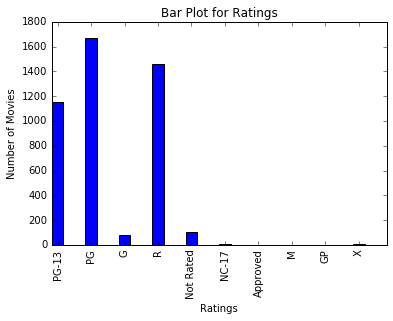

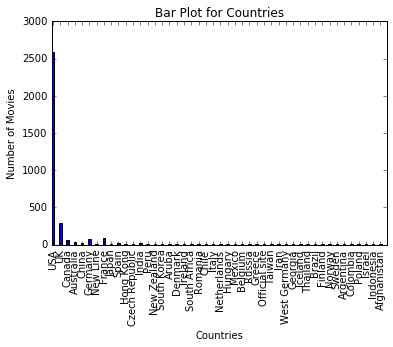

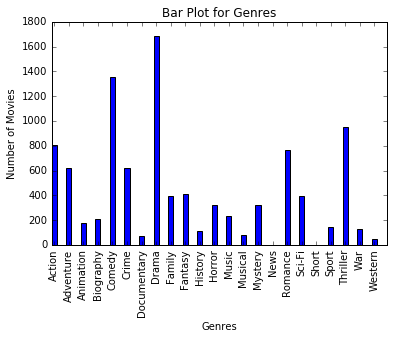

In [25]:
fig1 = plt.figure(1)
rating_sums = [movies[a].sum() for a in rating]
rating_num = len(rating_sums)
rating_range = range(rating_num)
width = 0.35
axes = plt.gca()
axes.set_xlim([0, len(rating)])
plt.bar(rating_range, rating_sums, width)
plt.xticks(np.arange(len(rating))+width*0.5,rating, rotation='vertical')
plt.title('Bar Plot for Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')

fig2 = plt.figure(2)
country_sums = [movies[a].sum() for a in countries]
country_num = len(country_sums)
country_range = range(country_num)
width=0.35
axes = plt.gca()
axes.set_xlim([0, len(countries)])
plt.bar(country_range,country_sums, width)
plt.xticks(np.arange(len(countries))+width*0.5,countries, rotation='vertical')
plt.title('Bar Plot for Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')

fig3 = plt.figure(3)
genre_sums = [movies[a].sum() for a in genres]
genre_num = len(genre_sums)
genre_range = range(genre_num)
width=0.35
axes = plt.gca()
axes.set_xlim([0, len(genres)])
plt.bar(genre_range,genre_sums, width)
plt.xticks(np.arange(len(genres))+width*0.5,genres, rotation='vertical')
plt.title('Bar Plot for Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')


In [21]:
#Print out a random row and check if its categorization is correct

#Force to display all columns
pd.set_option('display.max_rows', 200)

#Randomly select a row
movies.iloc[868]


num_critic_for_reviews                                             105
duration                                                            88
director_facebook_likes                                              8
gross                                                      2.81332e+07
genres                       Adventure|Animation|Comedy|Family|Fantasy
cast_total_facebook_likes                                        33822
facenumber_in_poster                                                 1
country                                                            USA
content_rating                                                      PG
budget                                                           5e+07
imdb_score                                                         5.9
Action                                                               0
Adventure                                                            1
Animation                                                            1
Biogra

In [22]:
movies = movies._get_numeric_data() #remove non-numeric columns
numeric_headers = list(movies.columns.values) #put the numeric column names in a python list
# create a numpy array with the numeric values for input into scikit-learn
movies_array = movies.as_matrix()

In [23]:
print(movies_array)

[[  3.02000000e+02   1.69000000e+02   5.63000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  8.13000000e+02   1.64000000e+02   2.20000000e+04 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.62000000e+02   1.32000000e+02   4.75000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  7.80000000e+01   1.11000000e+02   6.20000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.43000000e+02   7.70000000e+01   2.91000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.30000000e+01   9.00000000e+01   1.60000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [24]:
#select target variable as y, select input variables as x
y = movies_array[:, 3]
x = movies_array[:, list(range(0,3))+list(range(4,len(movies_array[0])))]

In [25]:
#print data shape
y.shape

(3321,)

In [26]:
#print data shape
x.shape

(3321, 86)

In [27]:
#Test if data can be used by scikit learn models
reg = linear_model.LinearRegression()
reg.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

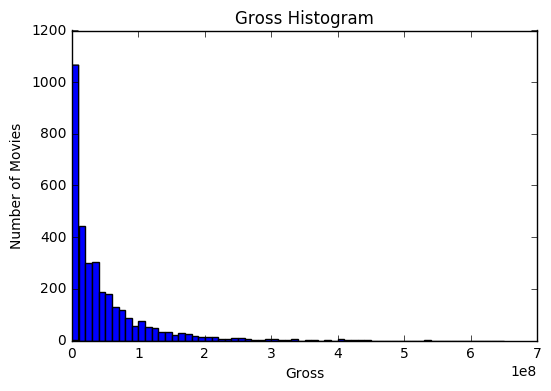

In [28]:
#histogram of target
plt.hist(y, bins=np.arange(min(y),max(y),10000000))
plt.title('Gross Histogram')
plt.xlabel('Gross')
plt.ylabel('Number of Movies')
plt.show()

In [29]:
#mean of target
np.mean(y)

45609806.448961154

In [30]:
#variance of target
np.var(y)

3801499075431798.0

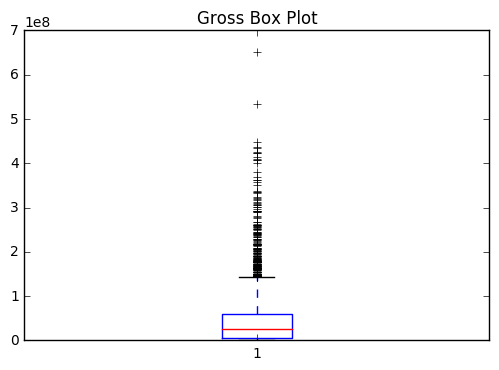

In [31]:
#box plot of target
plt.boxplot(y)
plt.title('Gross Box Plot')
plt.show()

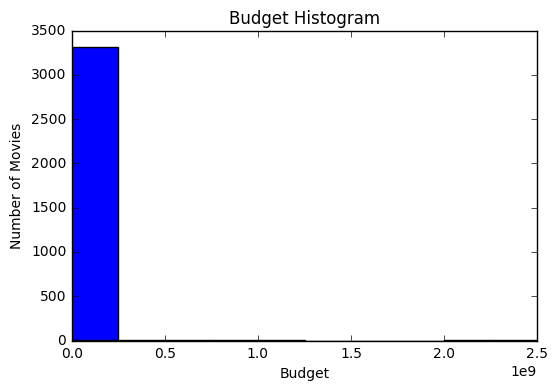

In [49]:
budget = movies_array[:, 6]
plt.hist(budget)
plt.title('Budget Histogram')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

In [50]:
print(numeric_headers)

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'imdb_score', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western', 'USA', 'UK', 'Canada', 'Australia', 'China', 'Germany', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Peru', 'New Zealand', 'South Korea', 'Aruba', 'Denmark', 'Ireland', 'South Africa', 'Romania', 'Chile', 'Italy', 'Netherlands', 'Hungary', 'Mexico', 'Belgium', 'Russia', 'Greece', 'Official site', 'Taiwan', 'Iran', 'West Germany', 'Georgia', 'Iceland', 'Thailand', 'Brazil', 'Finland', 'Norway', 'Sweden', 'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia', 'Afghanistan', 'PG-13', 'PG', 'G', 'R', 'Not Rated', 'NC-17', 'Approved', 'M', 'GP', 'X']


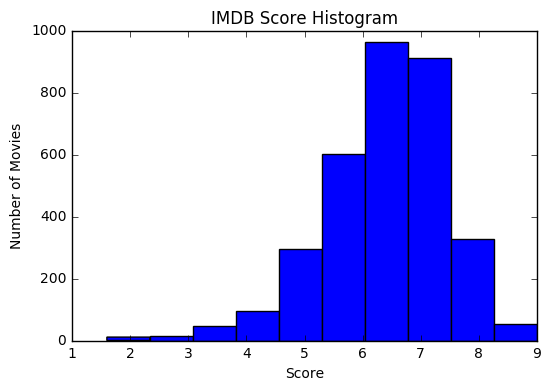

In [52]:
imdb_score = movies_array[:, 7]
plt.hist(imdb_score)
plt.title('IMDB Score Histogram')
plt.xlabel('Score')
plt.ylabel('Number of Movies')
plt.show()

In [55]:
print(movies['USA'].np.sum())

AttributeError: 'Series' object has no attribute 'np'